# Data Casal Montserratina

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

# Plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Others
import os
import holidays
from statsmodels.tsa.seasonal import seasonal_decompose

#Parameters Dict
parameters = {
    "paths": {
        "2022_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202201_202206.csv",
        "2022_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202207_202212.csv",
        "2023_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202301_202306.csv",
        "2023_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202307_202312.csv",
        "2024_01_05": "../data/data_casal_montserratina/Casal_Montserratina_202401_202405.csv",
    }
}

# Funciones

In [2]:
def grafico_zoom(df_x, df_y, title="", xaxis_title="", yaxis_title=""):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df_x, 
        y=df_y, 
        mode='lines', 
        name='Line', 
        connectgaps=False 
    ))
    fig.update_layout(
        title=title, 
        xaxis_title=xaxis_title, 
        yaxis_title=yaxis_title, 
        xaxis_tickangle=0, 
        showlegend=False
    )
    fig.show()

In [3]:
#Prints the NaN Values per Column of a dataset
def checkNaNValues(df):
    return print(f"NaN Count per Column", df.isna().any(axis=1).sum())

In [4]:
#Checks if there is any missing time series
def checkMissingData(df, date_column):
    min_date = df[date_column].min()
    max_date = df[date_column].max()

    date_range = pd.date_range(start=min_date, end=max_date, freq='h')
    missing_dates = date_range[~date_range.isin(df[date_column])]
    print(f"Number of Missing Values: {missing_dates.shape[0]}")
    return None if missing_dates.shape[0] == 0 else missing_dates, date_range

In [5]:
def getNumberOfOutliersPerColumn(df, columns_list):
    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        #Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        print(f"For {col} Column, the Number of Outliers is {outliers.sum()}. Sus limites son {lim_inf} y {lim_sup}.\n")

In [6]:
def dataframe_slicer (df, fecha_inicial, fecha_final):
    """
    Recorta el DataFrame en base a una fecha inicial y otra final.

    Parameters:
    df (DataFrame): El DataFrame original que contiene los datos.
    fecha_inicial (str): La fecha inicial en formato 'YYYY-MM-DD HH:MM:SS'.
    fecha_final (str): La fecha final en formato 'YYYY-MM-DD HH:MM:SS'.

    Returns:
    DataFrame: Un nuevo DataFrame recortado.
    """
    # Convertir las columnas de fecha a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filtrar el DataFrame en base a las fechas
    df_recortado = df[(df['Date'] >= fecha_inicial) & (df['Date'] <= fecha_final)]
    
    return df_recortado

# Load Data

In [7]:
ruta_data = "../data/data_casal_montserratina/"

In [8]:
df1 = pd.read_csv(parameters["paths"]["2022_01_06"], delimiter=";")
df2 = pd.read_csv(parameters["paths"]["2022_07_12"], delimiter=";")
df3 = pd.read_csv(parameters["paths"]["2023_01_06"], delimiter=";")
df4 = pd.read_csv(parameters["paths"]["2023_07_12"], delimiter=";")
df5 = pd.read_csv(parameters["paths"]["2024_01_05"], delimiter=";")

In [9]:
# hago un concat de los 4 datasets, para Unir los DataFrames uno a continuación del otro
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [10]:
df.head()

TimeStamp  Valor  Període tarifari Tipus lectura
0  01/01/2022 00:00      6                 6          Real
1  01/01/2022 01:00      6                 6          Real
2  01/01/2022 02:00      5                 6          Real
3  01/01/2022 03:00      7                 6          Real
4  01/01/2022 04:00      7                 6          Real

In [11]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"], format="%d/%m/%Y %H:%M")
df = df.drop(columns=["Tipus lectura", "Període tarifari"])
df.rename(columns={'TimeStamp': 'Date', 
                   'Valor': 'Consumo'}, inplace=True)
df

Date  Consumo
0     2022-01-01 00:00:00        6
1     2022-01-01 01:00:00        6
2     2022-01-01 02:00:00        5
3     2022-01-01 03:00:00        7
4     2022-01-01 04:00:00        7
...                   ...      ...
17683 2024-05-07 19:00:00       10
17684 2024-05-07 20:00:00        7
17685 2024-05-07 21:00:00        4
17686 2024-05-07 22:00:00        2
17687 2024-05-07 23:00:00        2

[17688 rows x 2 columns]

# Missing values

In [12]:
checkNaNValues(df)
missing_dates, date_range = checkMissingData(df, 'Date')

NaN Count per Column 0
Number of Missing Values: 2906


In [13]:
grafico_zoom(df["Date"], df["Consumo"],
              "Consumo Eléctrico (con Huecos) Casal La Monserratina - Años 2022, 2023 y 2024", "Consumo [kW]")

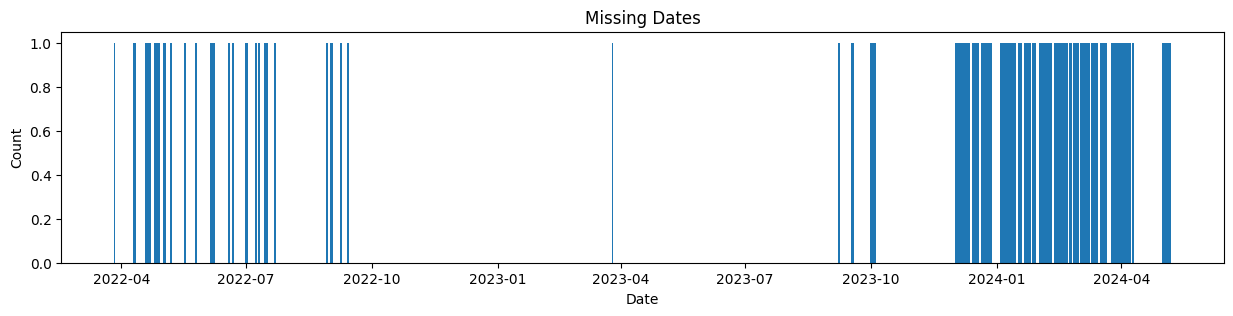

In [14]:
plt.figure(figsize=(15, 3))
plt.bar(missing_dates, [1] * len(missing_dates))
plt.title("Missing Dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

por ejemplo, si observamos las 

In [15]:
# un ejemplo de las fechas faltantes.
print(df[(df["Date"]>="2022-03-27 00:00:00") & (df["Date"]<"2022-03-27 05:00:00")])
# >>>>> notar que entre las 01:00 y las 03:00 no hay datos. 

# print(df[(df["Date"]>"2022-04-09 22:00:00") & (df["Date"]<"2022-04-11 01:00:00")])

# >>>>> notar que entre las 23 del 9/4 a las 00 del 11/4 no hay datos. 

                    Date  Consumo
2040 2022-03-27 00:00:00        2
2041 2022-03-27 01:00:00        3
2042 2022-03-27 03:00:00        2
2043 2022-03-27 04:00:00        2


### rellenar los huecos de Date

In [16]:
df = df.drop_duplicates(keep=False) # duplicados no hay, pero surgió un par de veces ese error al hacer e reindex. 

df.set_index("Date", inplace=True)

# Reindexa el DataFrame con el nuevo rango de fechas y rellena los valores faltantes con NaN
data_reindexed = df.reindex(date_range)

data_reindexed.reset_index(inplace=True)
data_reindexed.rename(columns={'index': 'Date'}, inplace=True) 

Ya no hay huecos en la columna Date, ahora aparecen rellenas!... con Nulls, tiny bam! 

In [17]:
print(data_reindexed[(data_reindexed["Date"]>"2022-04-09 22:00:00") & (data_reindexed["Date"]<"2022-04-11 01:00:00")])

                    Date  Consumo
2375 2022-04-09 23:00:00      2.0
2376 2022-04-10 00:00:00      NaN
2377 2022-04-10 01:00:00      NaN
2378 2022-04-10 02:00:00      NaN
2379 2022-04-10 03:00:00      NaN
2380 2022-04-10 04:00:00      NaN
2381 2022-04-10 05:00:00      NaN
2382 2022-04-10 06:00:00      NaN
2383 2022-04-10 07:00:00      NaN
2384 2022-04-10 08:00:00      NaN
2385 2022-04-10 09:00:00      NaN
2386 2022-04-10 10:00:00      NaN
2387 2022-04-10 11:00:00      NaN
2388 2022-04-10 12:00:00      NaN
2389 2022-04-10 13:00:00      NaN
2390 2022-04-10 14:00:00      NaN
2391 2022-04-10 15:00:00      NaN
2392 2022-04-10 16:00:00      NaN
2393 2022-04-10 17:00:00      NaN
2394 2022-04-10 18:00:00      NaN
2395 2022-04-10 19:00:00      NaN
2396 2022-04-10 20:00:00      NaN
2397 2022-04-10 21:00:00      NaN
2398 2022-04-10 22:00:00      NaN
2399 2022-04-10 23:00:00      NaN
2400 2022-04-11 00:00:00      2.0


In [18]:
getNumberOfOutliersPerColumn(data_reindexed, data_reindexed.columns.drop("Date"))

For Consumo Column, the Number of Outliers is 1980. Sus limites son -4.0 y 12.0.



### Interpolación NaN´s  

antes de hacer la interpolación, quiero entender como están distribuidos esos NaN´s a lo largo del DF.

In [19]:
def consecutive_nans(series):
    # Crear una serie booleana que es True donde la serie original es NaN
    is_nan = series.isna()

    # Identificar grupos de NaNs consecutivos
    nan_groups = ((is_nan.shift() != is_nan).cumsum()).where(is_nan, np.nan)
    print(nan_groups.isna().sum())
    # Contar el tamaño de cada grupo
    group_sizes = nan_groups.value_counts()#.sort_index()

    # Imprimir la lista de tamaños de grupos
    return group_sizes.tolist()


In [20]:
data_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20592 entries, 0 to 20591
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     20592 non-null  datetime64[ns]
 1   Consumo  17684 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 321.9 KB


17684
2908


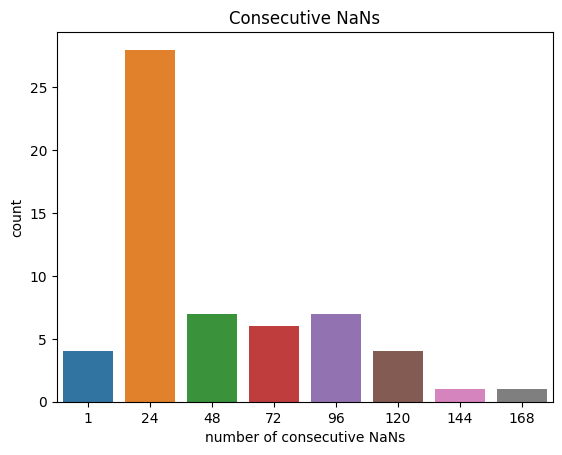

In [21]:
list_consecutive_nans = consecutive_nans(data_reindexed['Consumo'])
print(sum(list_consecutive_nans))

count = pd.Series(list_consecutive_nans).value_counts()
    
ax = sns.barplot(x=count.index, y=count.values)
ax.set_title('Consecutive NaNs')
ax.set_xlabel('number of consecutive NaNs')
ax.set_ylabel('count')

plt.show()

Veo que en general, huecos (como filas de NaN´s consecutivos) se agurpan en bloques de 24. Dado los datos vienen en frecuencia horaria, 24 NaN´s seguidos corresponden a 1 día, y 168 a 7 días. 

Tenía intención de hacer una función que haga interpolación **SOLO** de los bloques de NaN´s cortos, como para no afectar demasiado la función objetivo.
Puede hacerse interpolación de los pocos huecos de 1 hora, y el siguiente treshold sería ya de interpolar 24 horas... interpolaré hasta los bloques de 24 horas.

In [22]:
def interpolate_with_threshold(df, column, threshold):
    # Create a mask of NaNs
    mask = df[column].isna()

    # Identify groups of consecutive NaNs
    mask_diff = mask.diff().fillna(False)
    groups = mask_diff.cumsum()[mask]

    # Count the size of each group
    group_counts = groups.map(groups.value_counts())

    # Create a mask for groups that are less than or equal to the threshold
    interpolate_mask = group_counts <= threshold

    # Interpolate only where the mask is True
    df[column] = df[column].mask(mask).interpolate().where(interpolate_mask, df[column])

    # Count and print the number of interpolated and not interpolated values
    interpolated_count = interpolate_mask.sum()
    not_interpolated_count = mask.sum() - interpolated_count

    print(f"Interpolated count: {interpolated_count}")
    print(f"Not interpolated count: {not_interpolated_count}")

In [23]:
interpolate_with_threshold(data_reindexed, 'Consumo',25)

Interpolated count: 676
Not interpolated count: 2232


C:\Users\afernandez\AppData\Local\Temp\ipykernel_32256\2588710448.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [24]:
grafico_zoom(data_reindexed["Date"], data_reindexed["Consumo"],
              "Consumo Eléctrico (con (algunos) huecos reindexados) Casal La Monserratina - Años 2022, 2023 y 2024", "Consumo [kW]")

## Gaficas varias de la variable Consumo

### consumo resampleado a una semana

In [25]:
# Weekly Demand Plot
whole_df_1w = df.resample('1W').mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=whole_df_1w.index, y=whole_df_1w["Consumo"], mode='lines'))
fig.update_layout(
    title = "Consumo Eléctrico (Resample 1 semana) - Casal La Monserratina",
    xaxis_title = "Date",
    yaxis_title = "Demand (kWh)",
    width = 850,
    height = 400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

### consumo mes a mes

In [26]:
import calendar
from plotly.subplots import make_subplots
def plot_monthly_Consumo(df):
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)
    
    groups = df.groupby([df.index.year, df.index.month])
    num_plots = len(groups)
    fig = make_subplots(rows=6, cols=2, subplot_titles=[calendar.month_name[i] for i in range(1, 13)], horizontal_spacing=0.1, vertical_spacing=0.05)
    #colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = ['blue', 'orange', 'green']

    for month in range(1, 13):
        row = (month - 1) // 2 + 1
        col = (month - 1) % 2 + 1
        monthly_data = df[df.index.month == month]
        unique_years = monthly_data.index.year.unique()
        for i, year in enumerate(unique_years):
            year_data = monthly_data[monthly_data.index.year == year]
            year_data = year_data.copy()
            year_data.index = year_data.index.map(lambda x: x.replace(year=2022))  # Normalizar el año para superponer curvas
            fig.add_trace(
                go.Scatter(x=year_data.index, y=year_data["Consumo"], mode='lines', name=f"{year}",
                           legendgroup=f"{month}", line=dict(color=colors[i % len(colors)]), showlegend=False),
                row=row, col=col
            )
        if month == 1:
            for i, year in enumerate(unique_years):
                fig.add_trace(
                    go.Scatter(x=[None], y=[None], mode='lines', name=f"{year}",
                            legendgroup=f"{month}", line=dict(color=colors[i % len(colors)]), showlegend=True),
                    row=row, col=col
                )
                
        fig.update_xaxes(title_text="Date", row=row, col=col)
        fig.update_yaxes(title_text="Consumo (kWh)", row=row, col=col)
    fig.update_layout(
        title = {
            "text": "Monthly Energy Consumo",
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title="Date",
        yaxis_title="Consumo (kWh)",
        width=1200,
        height=2000,
        margin=dict(l=20, r=20, t=45, b=20)   
    )
    fig.show()

plot_monthly_Consumo(df)

## Slice Dataset
la idea es quedarse solo con la zona central, dejando fuera los picos del inicio, y los huecos del final. 

In [27]:
# Definir las fechas inicial y final
fecha_inicial = '2022-07-02 00:00:00' # 'YYYY-MM-DD HH:MM:SS'.
fecha_final = '2023-11-30 23:00:00'

# Obtener el DataFrame recortado
df_sliced = dataframe_slicer(data_reindexed, fecha_inicial, fecha_final)

In [28]:

grafico_zoom(df_sliced["Date"], df_sliced["Consumo"],
              "Consumo Eléctrico (CON HUECOS) Casal La Monserratina - de Julio 2022 a Dic 2023 ", "Consumo [kW]")

### Outliers del df_sliced

In [29]:
getNumberOfOutliersPerColumn(df_sliced, df_sliced.columns.drop("Date"))

For Consumo Column, the Number of Outliers is 1306. Sus limites son -2.5 y 9.5.



c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



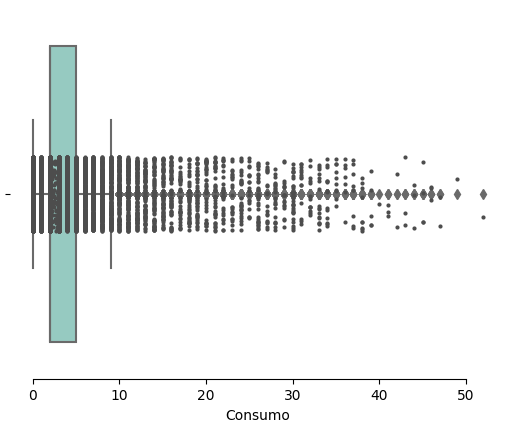

In [30]:
sns.boxplot(df_sliced, x="Consumo", width=0.8, palette="Set3")
# Add in points to show each observation
sns.stripplot(df_sliced, x="Consumo", size=3, color=".3")
sns.despine(trim=True, left=True)

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Consumo', ylabel='Count'>

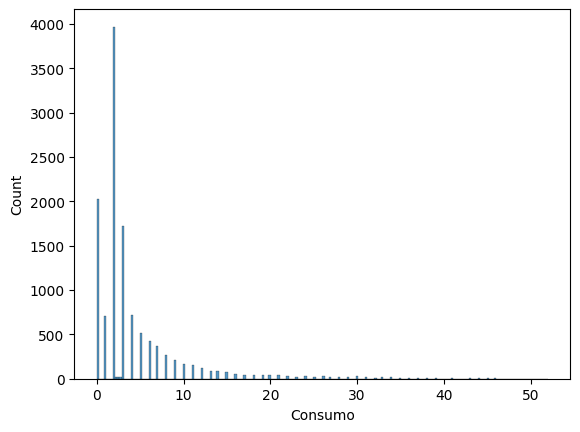

In [31]:
sns.histplot(df_sliced, x="Consumo")

## Smoothing w/moving average

In [32]:
from statsmodels.robust.scale import mad

# Define the window size for the rolling mean
window_size = 3 # datos horarios, es decir, que el window_size esta en horas.


# Calculate the rolling mean
df_sliced['Consumo_smooth_mean'] = df_sliced['Consumo'].rolling(window=window_size).mean()
#df_sliced['Consumo_smooth_std'] = df_sliced['Consumo'].rolling(window=window_size).std()
#df_sliced['Consumo_smooth_MAD'] = df_sliced['Consumo'].rolling(window=window_size).apply(mad)

C:\Users\afernandez\AppData\Local\Temp\ipykernel_32256\2023304538.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# Create traces for original and smoothed data
trace_original = go.Scatter(x=df_sliced["Date"], y=df_sliced['Consumo'], mode='lines', name='Original')
trace_smoothed_mean = go.Scatter(x=df_sliced["Date"], y=df_sliced['Consumo_smooth_mean'], mode='lines', name='Smoothed Mean')

# Create layout
layout = go.Layout(title='Original vs Smoothed Data', xaxis=dict(title='Date'), yaxis=dict(title='Consumption [kW]'))

# Create figure
fig = go.Figure(data=[trace_original, trace_smoothed_mean], layout=layout)

# Show figure
fig.show()

el rooling average lo que hace es calcular una media variable de la ventana definida. en este caso son bloques horarios, ej: window_size=3 hace un promedio de las ultimas 3 horas (aun no se ha aplicado upsampling a 15 min). Si bien no es la mejor idea utilizar una variable modificada como funcion objetivo, pareciera que la curva resultante tiene mucho menos ruido y copia casi perfectamente la curva original.

### Outliers del smoothed DF

In [34]:
df_sliced.describe()

Date       Consumo  Consumo_smooth_mean
count                12408  12288.000000         12282.000000
mean   2023-03-17 11:30:00      4.222168             4.223036
min    2022-07-02 00:00:00      0.000000             0.000000
25%    2022-11-08 05:45:00      2.000000             2.000000
50%    2023-03-17 11:30:00      2.000000             2.333333
75%    2023-07-24 17:15:00      5.000000             4.666667
max    2023-11-30 23:00:00     52.000000            47.666667
std                    NaN      5.769920             5.224750

In [35]:
getNumberOfOutliersPerColumn(df_sliced, df_sliced.columns.drop("Date"))

For Consumo Column, the Number of Outliers is 1306. Sus limites son -2.5 y 9.5.

For Consumo_smooth_mean Column, the Number of Outliers is 1370. Sus limites son -2.0 y 8.666666666666668.



<Axes: xlabel='Consumo_smooth_mean'>

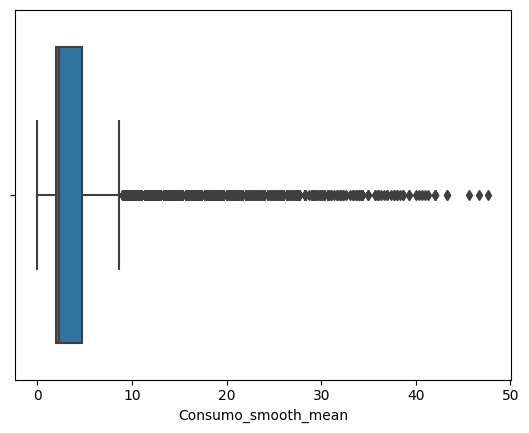

In [36]:
sns.boxplot(df_sliced, x="Consumo_smooth_mean")

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Consumo_smooth_mean', ylabel='Count'>

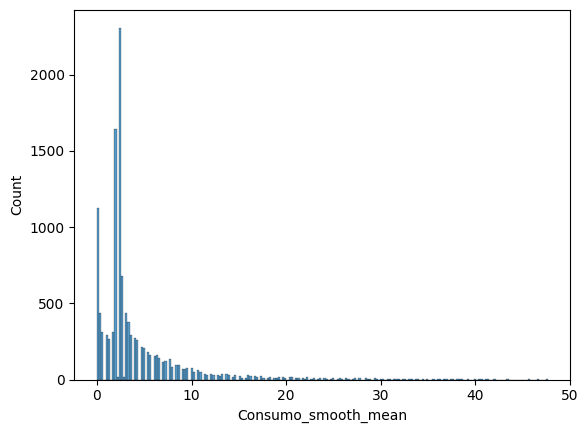

In [37]:
sns.histplot(df_sliced, x="Consumo_smooth_mean")

# upsampling a 15 min

In [38]:
df_upsampled = df_sliced.copy()

In [39]:
df_upsampled.set_index("Date", inplace=True)

In [40]:
df_upsampled = df_upsampled.resample('15min').interpolate(method='time')
df_upsampled

Consumo  Consumo_smooth_mean
Date                                             
2022-07-02 00:00:00     3.00                  NaN
2022-07-02 00:15:00     2.75                  NaN
2022-07-02 00:30:00     2.50                  NaN
2022-07-02 00:45:00     2.25                  NaN
2022-07-02 01:00:00     2.00                  NaN
...                      ...                  ...
2023-11-30 22:00:00     2.00             3.666667
2023-11-30 22:15:00     2.00             3.416667
2023-11-30 22:30:00     2.00             3.166667
2023-11-30 22:45:00     2.00             2.916667
2023-11-30 23:00:00     2.00             2.666667

[49629 rows x 2 columns]

# Merge Consumo con PPV

In [41]:
# Load the DataFrame with the PV & weather data

nombre_archivo = "LaMonserratina_weather_&_PV.csv"

df_PV = pd.read_csv(os.path.join(ruta_data, nombre_archivo))

df_PV.rename(columns={"timestamp_local": "Date"}, inplace=True)
df_PV.drop(columns=["Unnamed: 0"], inplace=True)
#df_PV.set_index("Date", inplace=True)


In [42]:
# Rename para quitar espacios y [] de los nombres de las columnas
df_PV.rename(columns={
       'pres [mb]':'pres_mb', 
       'slp [mb]':"slp_mb", 
       'wind_dir [m/s]':'wind_dir_m/s',
       'wind_gust_spd [m/s]':'wind_gust_spd_m/s', 
       'wind_spd [m/s]':'wind_spd_m/s', 
       'temp [C]':'temp_C', 
       'app_temp [C]':'app_temp_C', 
       'rh [%]':'rh_%', 
       'dewpt [C]':'dewpt_C', 
       'clouds [%]':'clouds_%', 
       'precip [mm]':'precip_mm', 
       'dhi [W/m^2]':'dhi_W/m2', 
       'dni [W/m^2]':'dni_W/m2', 
       'ghi [W/m^2]':'ghi_W/m2', 
       'solar_rad [W/m^2]':'solar_rad_W/m2',
       'uv [0-11+]':'uv_0-11', 
       'elev_angle [º]':'elev_angle_º', 
       'azimuth [º]':'azimuth_º',
       'Temp interna Modulo [C]':'Temp interna Modulo_C', 
       "PV [Wh]" : "PV_Wh"
       }, inplace=True)

In [43]:
df_PV.head(3)

Date  pres_mb  slp_mb  wind_dir_m/s  wind_gust_spd_m/s  \
0  2022-01-01 00:00:00   1027.0  1028.0         360.0                4.0   
1  2022-01-01 00:15:00   1027.0  1028.0         357.5                4.1   
2  2022-01-01 00:30:00   1027.0  1028.0         355.0                4.2   

   wind_spd_m/s  temp_C  app_temp_C   rh_%  dewpt_C  dhi_W/m2  dni_W/m2  \
0         1.275    10.7        10.7  88.25    9.500       0.0       0.0   
1         1.400    10.7        10.7  88.25    9.325       0.0       0.0   
2         1.800    10.7        10.7  88.25    9.150       0.0       0.0   

   ghi_W/m2  solar_rad_W/m2  uv_0-11  elev_angle_º  azimuth_º  \
0       0.0             0.0      0.0         -58.4    323.400   
1       0.0             0.0      0.0         -58.4    243.575   
2       0.0             0.0      0.0         -58.4    163.650   

   Temp interna Modulo_C  PV_Wh  
0              22.066196    0.0  
1              22.066196    0.0  
2              22.066196    0.0

In [44]:
checkNaNValues(df_PV)
missing_dates, date_range = checkMissingData(df_PV, 'Date')

NaN Count per Column 0
Number of Missing Values: 0


C:\Users\afernandez\AppData\Local\Temp\ipykernel_32256\1343014103.py:7: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [45]:
#df3.set_index("Date", inplace=True)

df_upsampled.rename(columns={"Consumo": "Consumo_kW"}, inplace=True)
df_upsampled.rename(columns={"Consumo_smooth_mean": "Consumo_smooth_mean_kW"}, inplace=True)

# df_upsampled.reset_index(inplace=True)
# df_upsampled.drop(columns=["index"], inplace=True)


df_upsampled.head(20)

Consumo_kW  Consumo_smooth_mean_kW
Date                                                   
2022-07-02 00:00:00        3.00                     NaN
2022-07-02 00:15:00        2.75                     NaN
2022-07-02 00:30:00        2.50                     NaN
2022-07-02 00:45:00        2.25                     NaN
2022-07-02 01:00:00        2.00                     NaN
2022-07-02 01:15:00        2.25                     NaN
2022-07-02 01:30:00        2.50                     NaN
2022-07-02 01:45:00        2.75                     NaN
2022-07-02 02:00:00        3.00                2.666667
2022-07-02 02:15:00        2.75                2.583333
2022-07-02 02:30:00        2.50                2.500000
2022-07-02 02:45:00        2.25                2.416667
2022-07-02 03:00:00        2.00                2.333333
2022-07-02 03:15:00        2.25                2.416667
2022-07-02 03:30:00        2.50                2.500000
2022-07-02 03:45:00        2.75                2.583333
2022-07-02 04:00:00        3.00                2.666667
2022-07-02 04:15:00        3.00                2.666667
2022-07-02 04:30:00        3.00                2.666667
2022-07-02 04:45:00        3.00                2.666667

In [46]:
df_upsampled.reset_index(inplace=True)
df_upsampled['Date'] = pd.to_datetime(df_upsampled['Date'])
df_PV['Date'] = pd.to_datetime(df_PV['Date'])

In [47]:
df4 = df_upsampled.merge(df_PV, how="inner", on="Date")
df4.sample(2)

Date  Consumo_kW  Consumo_smooth_mean_kW  pres_mb  \
3073 2022-08-03 00:15:00        2.75                2.583333   1014.0   
6051 2022-09-03 00:45:00        2.25                2.333333   1010.0   

       slp_mb  wind_dir_m/s  wind_gust_spd_m/s  wind_spd_m/s  temp_C  \
3073  1015.00         257.5                2.8        1.8250  28.150   
6051  1010.75         105.0                6.6        3.9675  23.575   

      app_temp_C  ...  dewpt_C  dhi_W/m2  dni_W/m2  ghi_W/m2  solar_rad_W/m2  \
3073       30.60  ...   21.325       0.0       0.0       0.0             0.0   
6051       23.85  ...   17.750       0.0       0.0       0.0             0.0   

      uv_0-11  elev_angle_º  azimuth_º  Temp interna Modulo_C  PV_Wh  
3073      0.0       -26.325      323.4              29.948500    0.0  
6051      0.0       -38.600      323.4              27.881936    0.0  

[2 rows x 21 columns]

hay un probma con las unidades, Consumo de Red esta en kW, y PV en W.. ajusto PV/1000. y agrego las unidades a los nombres para evitar confusiones

In [48]:
df4["PV_Wh"] = (df4["PV_Wh"]/1000000).round(3)
df4.sample(5)

Date  Consumo_kW  Consumo_smooth_mean_kW  pres_mb  \
13406 2022-11-18 15:30:00        3.00                2.500000  1007.00   
34471 2023-06-26 01:45:00        2.75                2.333333  1017.25   
8519  2022-09-28 17:45:00        3.25                1.666667  1004.00   
44550 2023-10-09 01:30:00        2.50                2.166667  1024.00   
20702 2023-02-02 15:30:00        3.50                2.500000  1026.00   

       slp_mb  wind_dir_m/s  wind_gust_spd_m/s  wind_spd_m/s  temp_C  \
13406  1008.0         200.0               6.60         1.650  17.400   
34471  1018.0         272.5               2.80         2.600  23.525   
8519   1004.0         255.0              11.00         4.465  26.150   
44550  1024.5         350.0               2.60         1.550  19.500   
20702  1027.0         220.0               4.09         4.090  13.650   

       app_temp_C  ...  dewpt_C  dhi_W/m2  dni_W/m2  ghi_W/m2  solar_rad_W/m2  \
13406      17.400  ...    9.300     72.50    634.00     254.5          241.50   
34471      24.325  ...   21.825      0.00      0.00       0.0            0.00   
8519       25.775  ...   10.025     75.75    659.75     295.5          290.75   
44550      19.800  ...   17.300      0.00      0.00       0.0            0.00   
20702      13.650  ...    4.900     84.50    724.00     358.0          358.00   

       uv_0-11  elev_angle_º  azimuth_º  Temp interna Modulo_C  PV_Wh  
13406     0.65        17.000    222.350              39.488243  3.478  
34471     0.00       -25.075     87.625              27.859351  0.000  
8519      1.20        19.750    247.725              44.025368  3.479  
44550     0.00       -54.350    176.250              26.041226  0.000  
20702     2.00        22.650    217.550              39.837878  3.960  

[5 rows x 21 columns]

## add some extra exogenous variables columns

In [49]:
df5 = df4.copy()
df5.sample(1)

Date  Consumo_kW  Consumo_smooth_mean_kW  pres_mb  \
28942 2023-04-29 11:30:00         6.0                     3.5   1012.5   

       slp_mb  wind_dir_m/s  wind_gust_spd_m/s  wind_spd_m/s  temp_C  \
28942  1013.5         100.0                8.0         4.895    20.3   

       app_temp_C  ...  dewpt_C  dhi_W/m2  dni_W/m2  ghi_W/m2  solar_rad_W/m2  \
28942       20.25  ...     15.1     113.0     880.5     775.0           741.0   

       uv_0-11  elev_angle_º  azimuth_º  Temp interna Modulo_C  PV_Wh  
28942      3.1          49.6     121.95              46.395225  4.545  

[1 rows x 21 columns]

In [ ]:
df5["Year"] = df5["Date"].dt.year
df5["Month"] = df5["Date"].dt.month
df5["Hour"] = df5["Date"].dt.hour
df5["DayOfWeek"] = df5["Date"].dt.day_of_week
df5["DayOfYear"] = df5["Date"].dt.day_of_year
df5["Day"] = df5["Date"].dt.day
#df5["Minute"] = df5["Date"].dt.minute

KeyboardInterrupt: 

In [ ]:
#Sine and Cosine Transformations
def cyclical_encoding(df, cycle_length_list, columns):
    for col, cycle_length in zip(columns, cycle_length_list):
        if df[col].min == 0:
            df[f"{col}_sin"] = np.sin((df[col] / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos((df[col] / cycle_length) * np.pi * 2).round(4)
        else:
            df[f"{col}_sin"] = np.sin(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
    return df

In [ ]:

#Add isWeekend Column based in DayOfTheWeek Value
df5["isWeekend"] = df5["DayOfWeek"].isin([5, 6])

cycle_lengths = [24, 7, 12, 365]
cols = ["Hour", "DayOfWeek", "Month", "DayOfYear"]

df5 = cyclical_encoding(df5, cycle_lengths, cols)

df5.sample(5)

Date  Consumo_kW  Consumo_smooth_mean_kW  pres_mb  \
30600 2023-05-16 18:00:00        6.00                5.000000  1009.00   
35474 2023-07-06 12:30:00        1.00                2.166667  1015.00   
29044 2023-04-30 13:00:00        0.00                4.000000  1014.00   
7308  2022-09-16 03:00:00        2.00                2.000000  1011.00   
42473 2023-09-17 10:15:00        2.45                2.410000  1011.25   

       slp_mb  wind_dir_m/s  wind_gust_spd_m/s  wind_spd_m/s  temp_C  \
30600  1010.0         130.0             6.0000        4.5900  19.600   
35474  1016.0         120.0             4.8000        3.8450  27.750   
29044  1015.0         160.0             5.2000        4.0900  22.000   
7308   1011.0         360.0             3.6000        3.1000  23.600   
42473  1012.0         357.5             4.5425        4.0925  23.025   

       app_temp_C  ...  Day  isWeekend  Hour_sin  Hour_cos  DayOfWeek_sin  \
30600      19.200  ...   16      False   -0.9659   -0.2588         0.0000   
35474      28.100  ...    6      False    0.2588   -0.9659         0.9749   
29044      21.900  ...   30       True    0.0000   -1.0000        -0.9749   
7308       24.100  ...   16      False    0.5000    0.8660         0.4339   
42473      23.425  ...   17       True    0.7071   -0.7071        -0.9749   

       DayOfWeek_cos  Month_sin  Month_cos  DayOfYear_sin  DayOfYear_cos  
30600         1.0000      0.866       -0.5         0.7296        -0.6839  
35474        -0.2225      0.000       -1.0        -0.0602        -0.9982  
29044        -0.2225      1.000        0.0         0.8881        -0.4597  
7308         -0.9010     -0.866       -0.5        -0.9635        -0.2678  
42473        -0.2225     -0.866       -0.5        -0.9679        -0.2512  

[5 rows x 36 columns]

In [ ]:
def generateHolidayVar(df):
    df["Reduced_Date"] = df["Date"].dt.date
    list_holidays = holidays.Spain(prov="CT", years=list(df["Year"].unique()))
    list_holidays_dates = np.array(list(list_holidays.keys()), dtype='datetime64')
    df["isHoliday"] = df["Reduced_Date"].isin(list_holidays_dates)
    df = df.drop('Reduced_Date', axis=1)
    return df

df5 = generateHolidayVar(df5)
display(df5[["Date", "isHoliday"]].sample(5))

Date  isHoliday
42199 2023-09-14 13:45:00      False
24539 2023-03-14 14:45:00      False
27485 2023-04-14 07:15:00      False
23210 2023-02-28 18:30:00      False
31124 2023-05-22 05:00:00      False

# Plots

## Demand Distribution Plots

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Consumo_kW', ylabel='Count'>

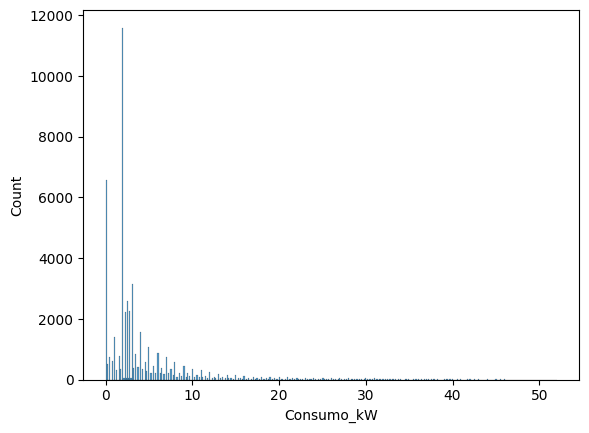

In [ ]:
sns.histplot(df5["Consumo_kW"])

Text(0.5, 0.98, '')

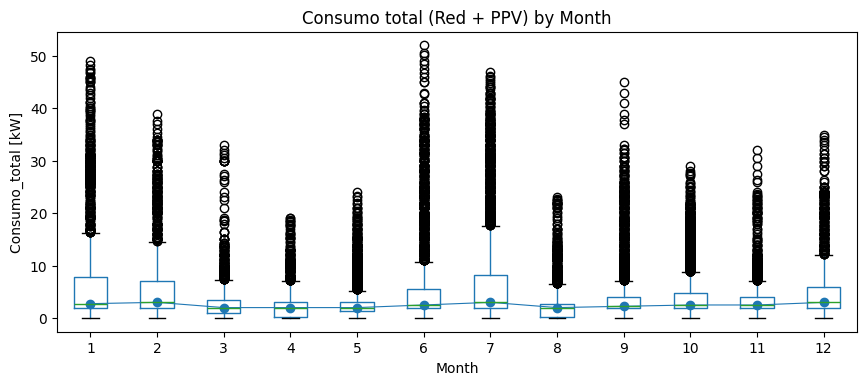

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_kW', by='Month', ax=ax)
df5.groupby('Month')['Consumo_kW'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Consumo_total [kW]')
ax.set_title("Consumo total (Red + PPV) by Month")
fig.suptitle('')

## Consumo total por día

Text(0.5, 0.98, '')

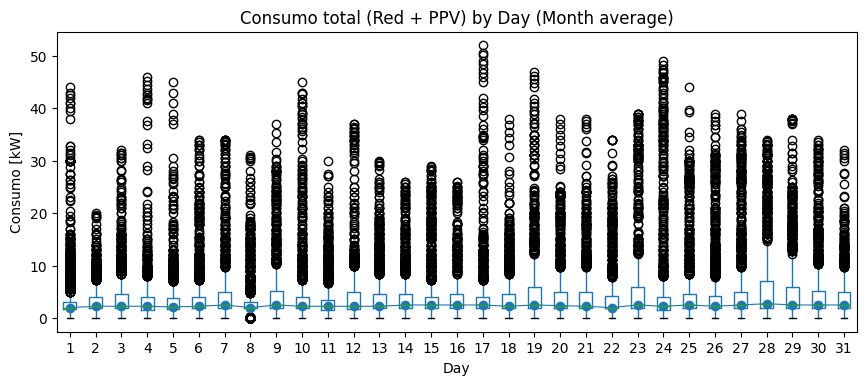

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_kW', by='Day', ax=ax)
df5.groupby('Day')['Consumo_kW'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Consumo [kW]')
ax.set_title("Consumo total (Red + PPV) by Day (Month average)")
fig.suptitle('')

Text(0.5, 0.98, '')

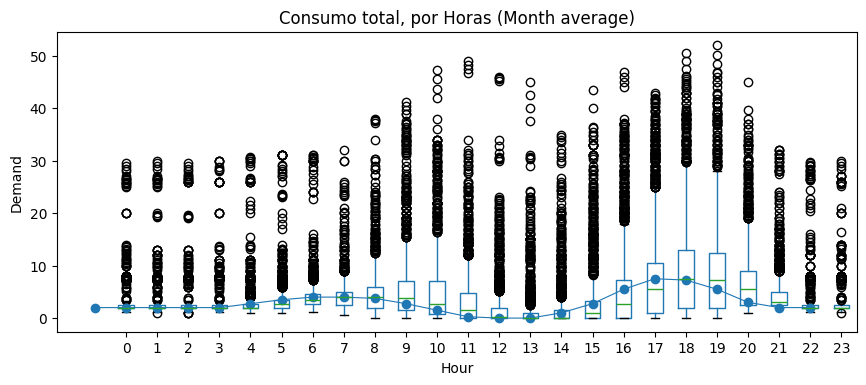

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_kW', by='Hour', ax=ax)
df5.groupby('Hour')['Consumo_kW'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title("Consumo total, por Horas (Month average)")
fig.suptitle('')

## Demand per Day and Season

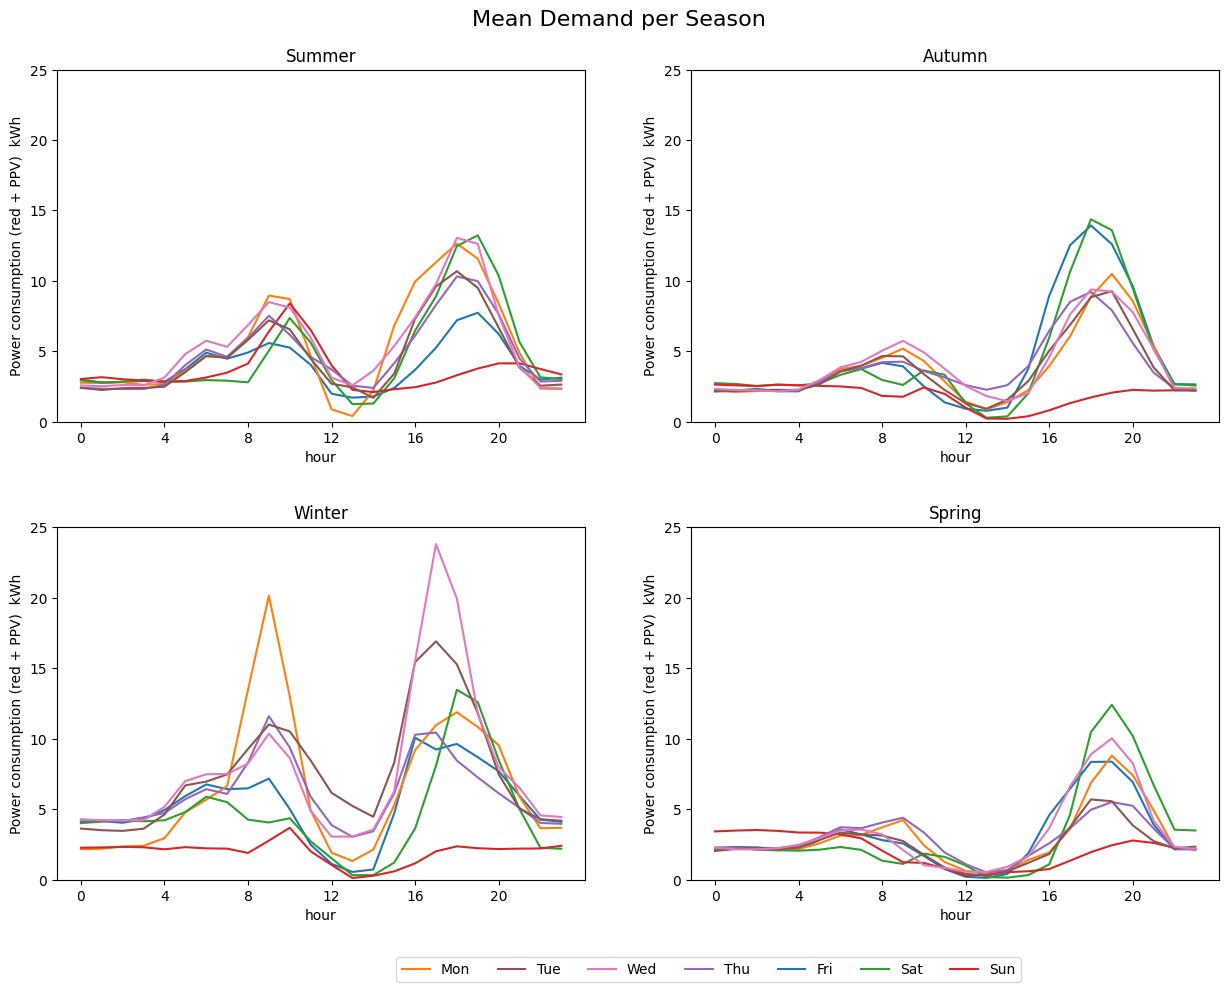

In [ ]:
days_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df5["Day"] = df5["DayOfWeek"].map(days_mapping)
df5["Season"] = df5["Month"].apply(
    lambda x: (
        1 if x in [3, 4, 5] #Spring
        else 2 if x in [6, 7, 8] #Summer
        else 3 if x in [9, 10, 11] #Autumn
        else 0 #Winter
    )
)
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.92)
fig.suptitle("Mean Demand per Season", fontsize=16)

fig.set_figheight(10)
fig.set_figwidth(15)

ymin, ymax = 0, 25

#Season Summer
df5.loc[df5["Season"] == 2] \
    .groupby([df5.loc[df5["Season"] == 2]["Hour"], 'Day'])["Consumo_kW"].mean().unstack().plot(
        ax=axes[0, 0], ylim=(ymin, ymax), title="Summer", legend=False
    )
df5.loc[df5["Season"] == 3] \
    .groupby([df5.loc[df5["Season"] == 3]["Hour"], 'Day'])["Consumo_kW"].mean().unstack().plot(
        ax=axes[0, 1], ylim=(ymin, ymax), title="Autumn", legend=False
    )
df5.loc[df5["Season"] == 0] \
    .groupby([df5.loc[df5["Season"] == 0]["Hour"], 'Day'])["Consumo_kW"].mean().unstack().plot(
        ax=axes[1, 0], ylim=(ymin, ymax), title="Winter", legend=False
    )
df5.loc[df5["Season"] == 1] \
    .groupby([df5.loc[df5["Season"] == 1]["Hour"], 'Day'])["Consumo_kW"].mean().unstack().plot(
        ax=axes[1, 1], ylim=(ymin, ymax), title="Spring", legend=False
    )

for ax in axes.flat:
    ax.set(xlabel='hour', ylabel='Power consumption (red + PPV)  kWh')

for n in range(0, 2):
    axes[n, 0].set_xticks([0, 4, 8, 12, 16, 20])
    axes[n, 1].set_xticks([0, 4, 8, 12, 16, 20])
df5 = df5.drop("Day", axis=1)
# LEGEND
handles, labels = plt.gca().get_legend_handles_labels() # reorder Legend Labels
order = [1,5,6,4,0,2,3]      # specify order in Legend
axes[1,1].legend([handles[i] for i in order], [labels[i] for i in order], loc=1, ncol=7, 
                 bbox_to_anchor=(0.638,-0.2), frameon=True) # print and order LEGEND

## Temperature Distribution by Hour

Text(0.5, 0.98, '')

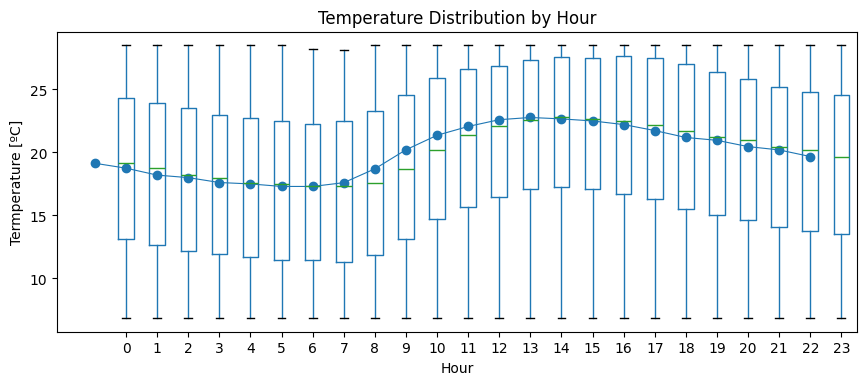

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='temp_C', by='Hour', ax=ax)
df5.groupby('Hour')['temp_C'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Termperature [ºC]')
ax.set_title("Temperature Distribution by Hour")
fig.suptitle('')

## Relacion entre Demanda Energética y Temperatura. 

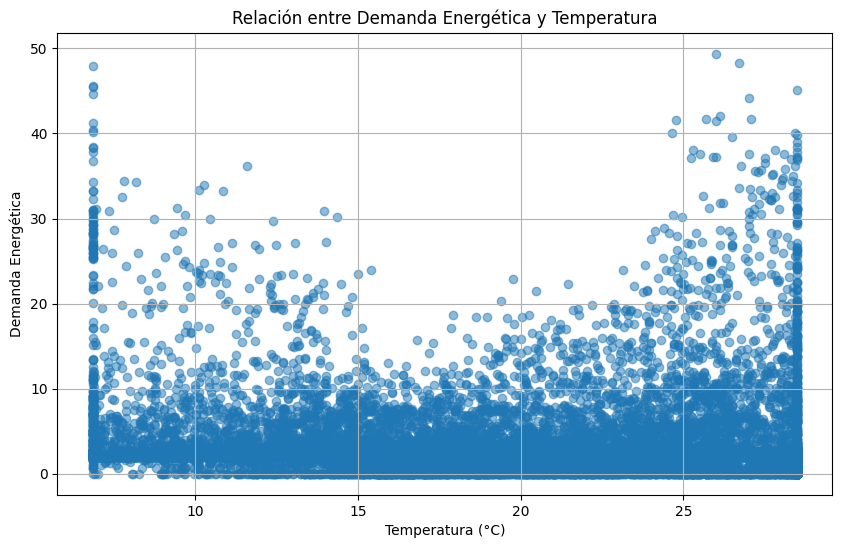

In [ ]:
def plot_temp_vs_demand(df):
    df = df.copy()
    df.set_index("Date", inplace=True)
    df_1h = df.resample('1h').mean()
    plt.figure(figsize=(10, 6))
    plt.scatter(df_1h['temp_C'], df_1h['Consumo_kW'], alpha=0.5)
    plt.title('Relación entre Demanda Energética y Temperatura')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Demanda Energética')
    plt.grid(True)
    plt.show()
plot_temp_vs_demand(df5)

Si hubiese buena correlacion entre demanda y temperatura, los puntos deberían formar una especie de "U", ya que cuanto mayor o menor sea la temperatura, mayor será el consumo energético para mejorar el confort. 

Por otro lado, los bordes rectos se deben a la windsorización de la temperatura en el preprocessing. 

## Irradiacion Solar (Mensual)

Text(0.5, 0.98, '')

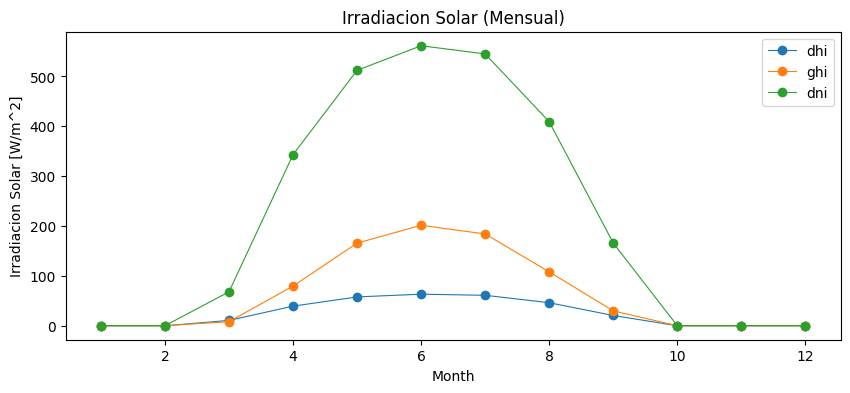

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

# df5.boxplot(column='dhi_W/m2', by='Month', ax=ax)
df5.groupby('Month')['dhi_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

# df5.boxplot(column='ghi_W/m2', by='Month', ax=ax)
df5.groupby('Month')['ghi_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

# df5.boxplot(column='dni_W/m2', by='Month', ax=ax)
df5.groupby('Month')['dni_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m^2]')
ax.set_title("Irradiacion Solar (Mensual)")
fig.suptitle('')

## Irradiacion Solar (Horaria)

Text(0.5, 0.98, '')

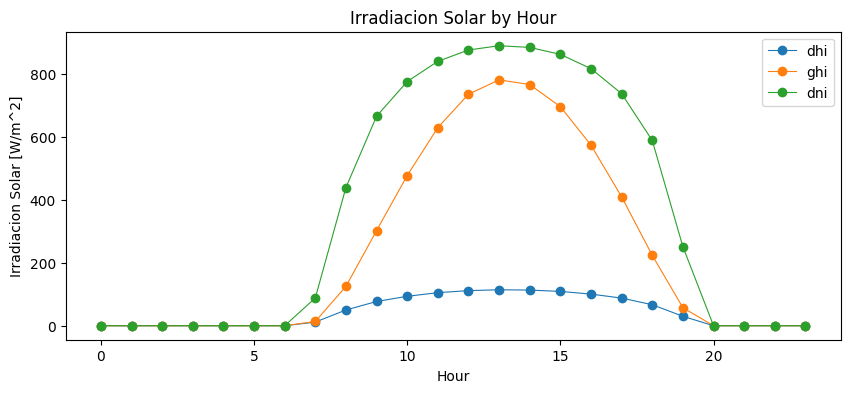

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

# df5.boxplot(column='dhi_W/m2', by='Hour', ax=ax)
df5.groupby('Hour')['dhi_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

# df5.boxplot(column='ghi_W/m2', by='Hour', ax=ax)
df5.groupby('Hour')['ghi_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

# df5.boxplot(column='dni_W/m2', by='Hour', ax=ax)
df5.groupby('Hour')['dni_W/m2'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m^2]')
ax.set_title("Irradiacion Solar by Hour")
fig.suptitle('')

## AutoCorrelation Plots

In [ ]:
df5.head()

Date  Consumo_kW  Consumo_smooth_mean_kW  pres_mb  slp_mb  \
0 2022-07-02 00:00:00        3.00                     NaN   1019.0  1020.0   
1 2022-07-02 00:15:00        2.75                     NaN   1019.0  1020.0   
2 2022-07-02 00:30:00        2.50                     NaN   1019.0  1020.0   
3 2022-07-02 00:45:00        2.25                     NaN   1019.0  1020.0   
4 2022-07-02 01:00:00        2.00                     NaN   1019.0  1020.0   

   wind_dir_m/s  wind_gust_spd_m/s  wind_spd_m/s  temp_C  app_temp_C  ...  \
0         150.0                2.8           1.5  23.100      23.000  ...   
1         192.5                2.6           1.5  22.825      22.725  ...   
2         235.0                2.6           1.5  22.550      22.450  ...   
3         277.5                2.6           1.5  22.275      22.175  ...   
4         320.0                2.6           1.5  22.000      21.900  ...   

   Hour_sin  Hour_cos  DayOfWeek_sin  DayOfWeek_cos  Month_sin  Month_cos  \
0   -0.2588    0.9659        -0.4339         -0.901        0.0       -1.0   
1   -0.2588    0.9659        -0.4339         -0.901        0.0       -1.0   
2   -0.2588    0.9659        -0.4339         -0.901        0.0       -1.0   
3   -0.2588    0.9659        -0.4339         -0.901        0.0       -1.0   
4    0.0000    1.0000        -0.4339         -0.901        0.0       -1.0   

   DayOfYear_sin  DayOfYear_cos  isHoliday  Season  
0         0.0086           -1.0      False       2  
1         0.0086           -1.0      False       2  
2         0.0086           -1.0      False       2  
3         0.0086           -1.0      False       2  
4         0.0086           -1.0      False       2  

[5 rows x 37 columns]

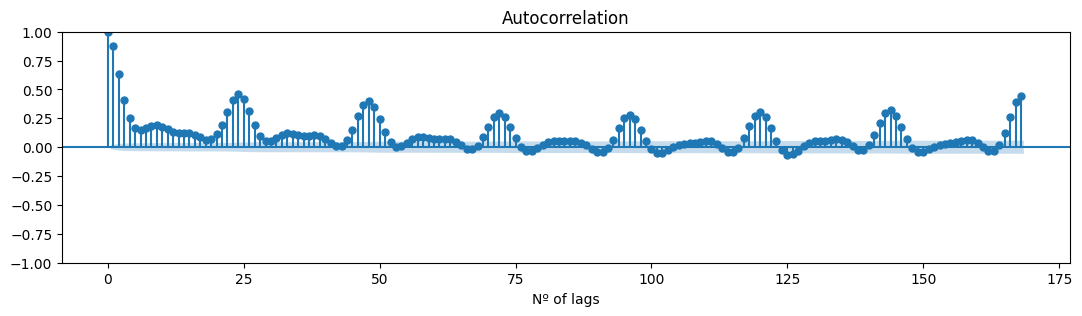

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
#Gráfico de autocorrelación 1
df5.set_index("Date", inplace=True)
demand_df_1h = df5.resample('1h').mean()
fig, ax = plt.subplots(figsize=(13, 3))
plt.xlabel("Nº of lags")
plot_acf(demand_df_1h["Consumo_kW"], ax=ax, lags=24*7)
plt.show()

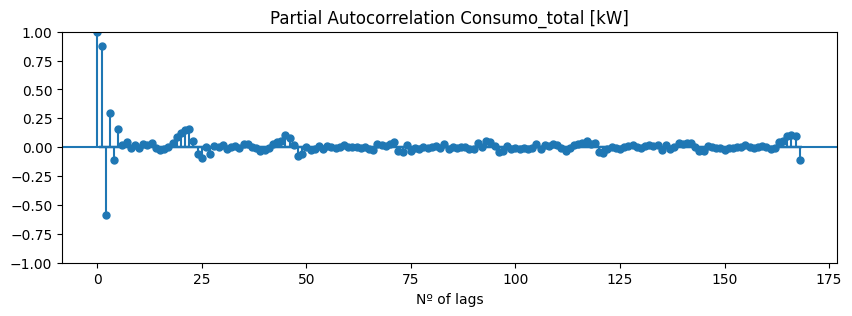

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
#Gráfico de autocorrelación parcial
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")
plot_pacf(demand_df_1h["Consumo_kW"], ax=ax, lags=24*7)
plt.title("Partial Autocorrelation Consumo_total [kW]")
plt.show()

## Correlation Matrix

In [ ]:
df5.columns

Index(['Consumo_kW', 'Consumo_smooth_mean_kW', 'pres_mb', 'slp_mb',
       'wind_dir_m/s', 'wind_gust_spd_m/s', 'wind_spd_m/s', 'temp_C',
       'app_temp_C', 'rh_%', 'dewpt_C', 'dhi_W/m2', 'dni_W/m2', 'ghi_W/m2',
       'solar_rad_W/m2', 'uv_0-11', 'elev_angle_º', 'azimuth_º',
       'Temp interna Modulo_C', 'PV_Wh', 'Year', 'Month', 'Hour', 'DayOfWeek',
       'DayOfYear', 'isWeekend', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin',
       'DayOfWeek_cos', 'Month_sin', 'Month_cos', 'DayOfYear_sin',
       'DayOfYear_cos', 'isHoliday', 'Season'],
      dtype='object')

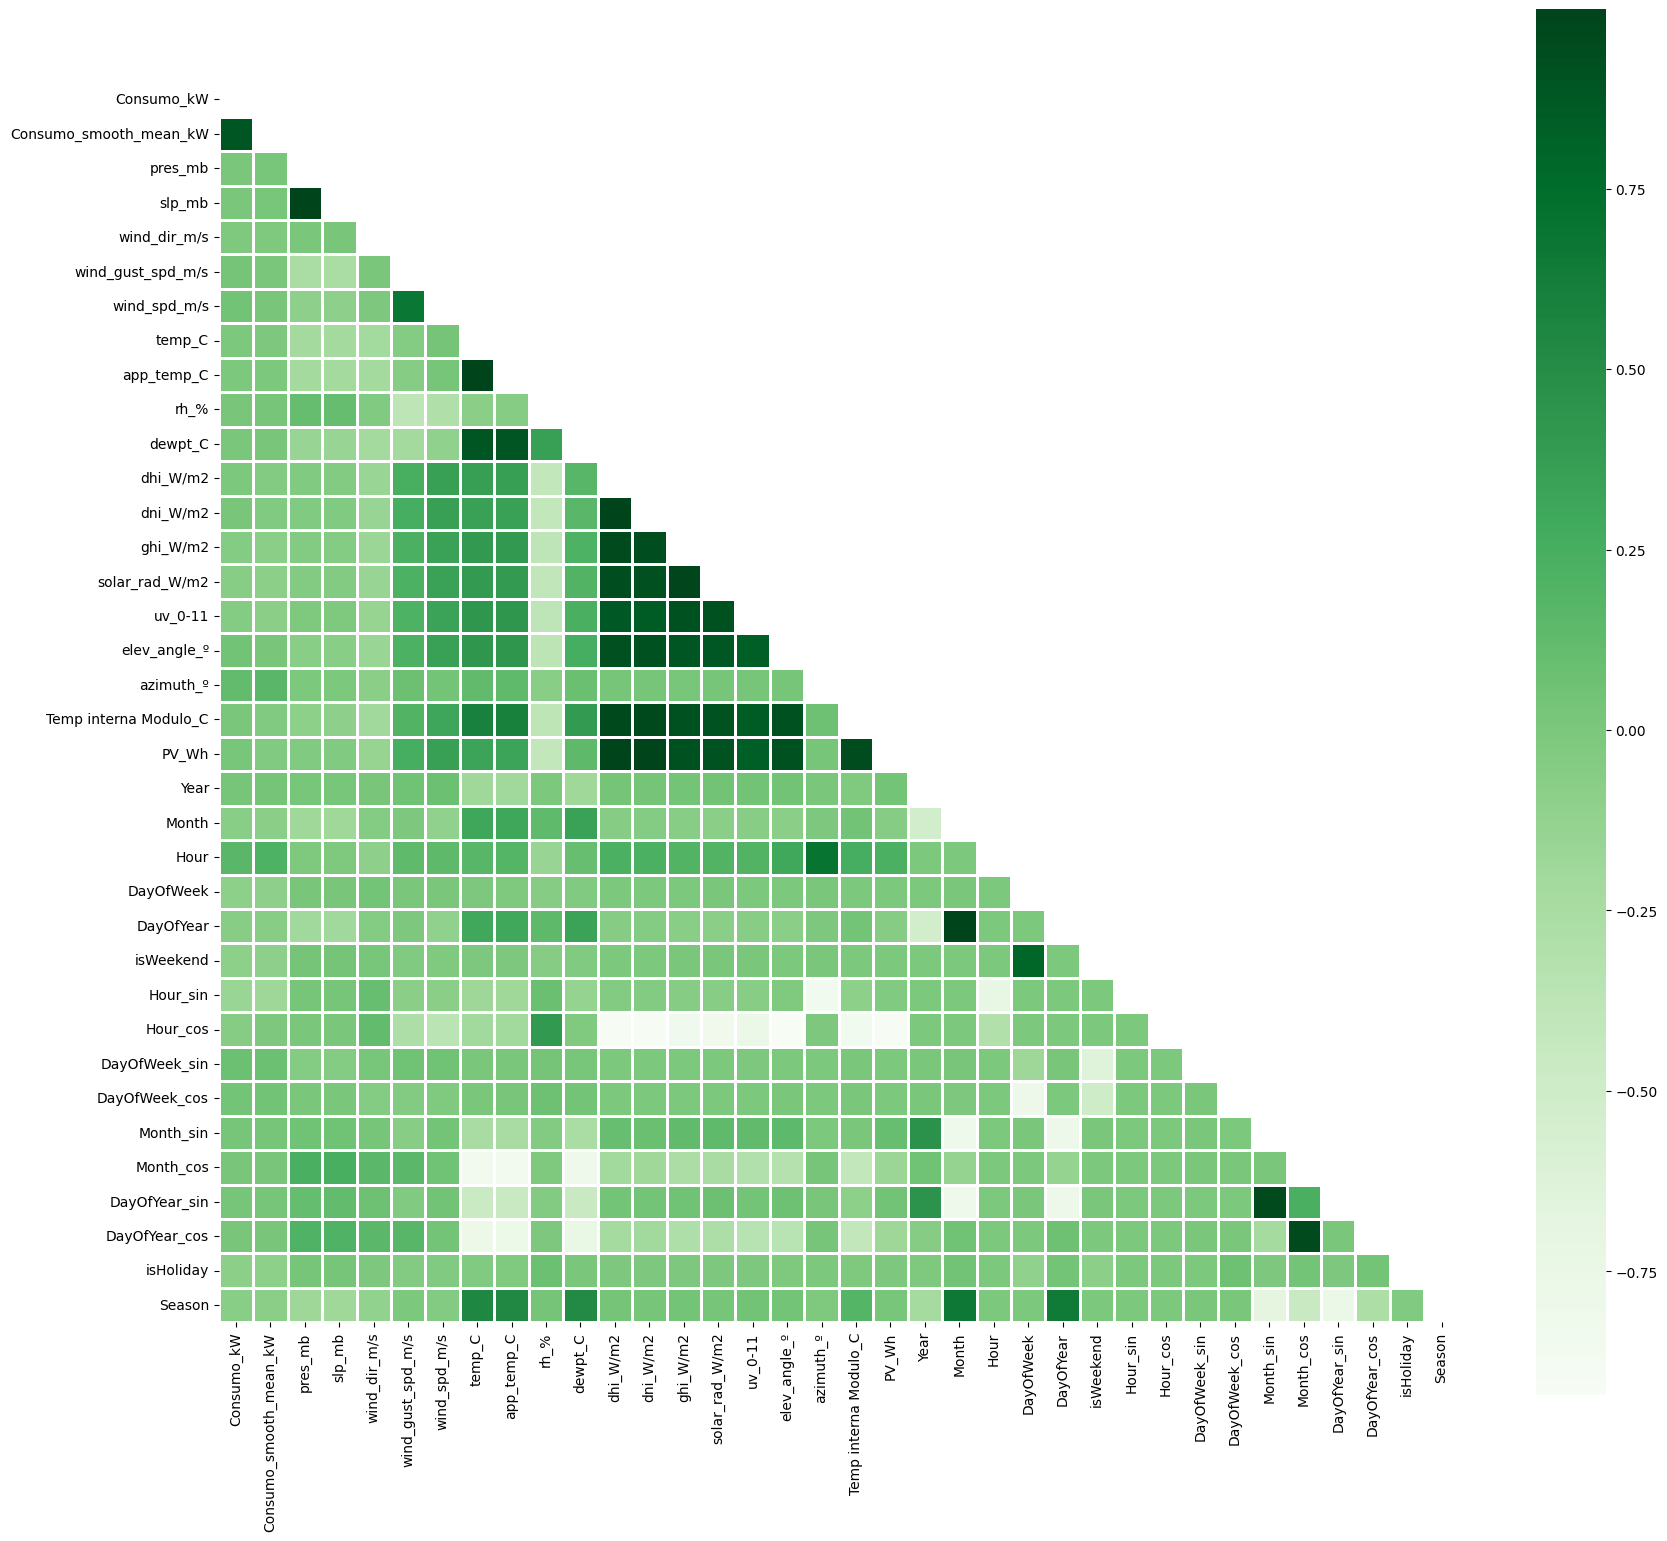

In [ ]:
# Calcula la matriz de correlación completa
correlation_matrix = df5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# Imprime la matriz de correlación del cuadrante inferior
#plotting the heatmap for correlation
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, mask=mask, square=True, cmap='Greens', linewidths=2, linecolor='white');

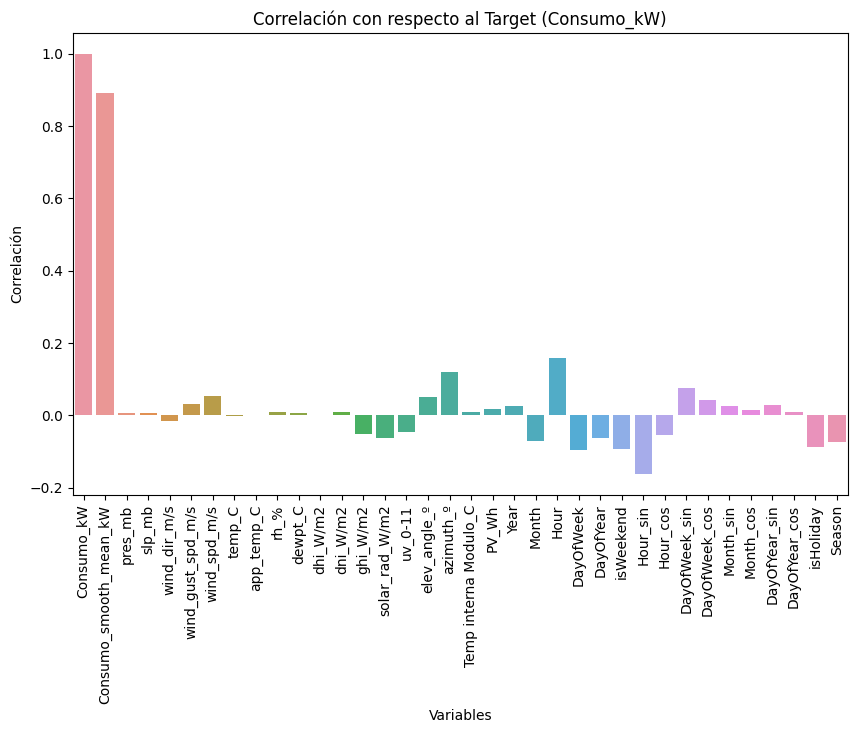

In [ ]:
# Crear un gráfico de barras de la correlación respecto a la variable específica
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Consumo_kW'])
plt.title('Correlación con respecto al Target (Consumo_kW)')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

## Time series decpomposition

In [ ]:
def decompose_time_series(df, column, freq):
    result = seasonal_decompose(df[column], model='additive', period=freq)
    df[f"{column}_trend"] = result.trend
    df[f"{column}_seasonal"] = result.seasonal
    df[f"{column}_residual"] = result.resid
    return df

In [ ]:
decomposed_df = decompose_time_series(df5, "Consumo_kW", 96)

decomposed_df.reset_index(inplace=True, drop=False)


decomposed_df.set_index('Date', inplace=True)


# Plot the decomposed time series
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
decomposed_df["Consumo_kW"].plot(ax=axes[0], title="Original")
decomposed_df["Consumo_kW_trend"].plot(ax=axes[1], title="Trend")
decomposed_df["Consumo_kW_seasonal"].plot(ax=axes[2], title="Seasonal")
decomposed_df["Consumo_kW_residual"].plot(ax=axes[3], title="Residual")
plt.tight_layout()

Error in callback <function flush_figures at 0x000001F7C52A8900> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# SAVE csv

In [ ]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_CLEAN.csv"
ruta_completa = os.path.join(ruta_data, nombre_archivo)
df5.to_csv(ruta_completa, index=False)